 In this script I compare the Green functions computed only at specific redshifts, with different combinations of xe and hc. It should be more clear the difference with less lines

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import CubicSpline
from my_plot import set_size
import seaborn as sns
width =  508.0
widthcol = 244
plt.rcParams['font.size']=12

In [2]:
def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        coefficient=float(coefficient)
        if (coefficient == 1.00):
            return f"$ 10^{{{exponent}}}$"  # Notazione LaTeX
        else: 
            return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX

In [3]:
colors1=sns.color_palette("rocket",4) #personal fav 
colors2=sns.color_palette("mako",4) #also nice
colors3 = plt.colormaps['Spectral'].resampled(4)

#Ram's colors, if desired
colors4 = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
#            0sangre,   1neptune,  2pumpkin,  3clover,   4denim,    5cocoa,    6cumin,    7berry

In [4]:
K = 1.380649e-23 # J / K
vc = 299792458 #m / s
h_pl = 6.62607015e-34 #J*s
T = 2.72548 #K

In [5]:
zh = [1e3,1e4,5e5]
zh2= [1e2,1e3,1e4,5e5]

In [6]:
#only hubble cooling
folder1 = 'outputs/Greens_delta_comparison/outputs-Greenshc2/batch/PDE-non-linear'
nu = []
DT = []
DI_N = [] 


for i in range (len(zh2)):
    file_path = os.path.join(folder1, f"Dn_final.delta-z_Greens_z_h_00{i+1}.dat")
      
    op = pd.read_csv(file_path, skiprows=7, delimiter=' ', header=None)

    a = op.iloc[:, 8].values
    nu.append(a)
    b = op.iloc[:, 3].values
    DT.append(b)
    e = op.iloc[:, 5].values
    DI_N.append(e)  #the one in the file it is a number density value, not in Jy/sr!!the


#x = np.array(x)
#nu = K *x * int(T) /h_pl  


In [7]:
#only xe
folder2 = 'outputs/Greens_delta_comparison/outputs-Greensxe/batch/PDE-non-linear'
nu2 = []
DT2 = []
DI_N2 = [] 


for i in range (len(zh)):
    file_path = os.path.join(folder2, f"Dn.delta-z_Greens_z_h_00{i+1}.dat")
      
    op = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)

    a = op.iloc[:, 6].values
    nu2.append(a)
    b = op.iloc[:, 3].values
    DT2.append(b)
    e = op.iloc[:, 5].values
    DI_N2.append(e*(2*K**3*T**3)/(vc**2*h_pl**2)*1e26)

#x2 = np.array(x2)
#nu2 = K *x2 * int(T) /h_pl  



In [8]:
#only xe
folder3 = 'outputs/Greens_delta_comparison/outputs-Greensxehc/batch/PDE-non-linear'
nu3 = []
DT3 = []
DI_N3 = [] 


for i in range (len(zh)):
    file_path = os.path.join(folder3, f"Dn.delta-z_Greens_z_h_00{i+1}.dat")
      
    op = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)

    a = op.iloc[:, 6].values
    nu3.append(a)
    b = op.iloc[:, 3].values
    DT3.append(b)
    e = op.iloc[:, 5].values
    DI_N3.append(e*(2*K**3*T**3)/(vc**2*h_pl**2)*1e26)

#x3 = np.array(x3)
#nu3 = K *x3 * int(T) /h_pl  



In [9]:
#no xe nor hc
folder4 = 'outputs/Greens_delta_comparison/outputs-Greens2/batch/PDE-non-linear'
nu4 = []
DT4 = []
DI_N4 = [] 


for i in range (len(zh2)):
    file_path = os.path.join(folder4, f"Dn_final.delta-z_Greens_z_h_00{i+1}.dat")
      
    op = pd.read_csv(file_path, skiprows=7, delimiter=' ', header=None)

    a = op.iloc[:, 8].values
    nu4.append(a)
    b = op.iloc[:, 3].values
    DT4.append(b)
    e = op.iloc[:, 5].values
    DI_N4.append(e*(2*K**3*T**3)/(vc**2*h_pl**2)*1e26)

#x4 = np.array(x4)
#nu4 = K *x4 * int(T) /h_pl   


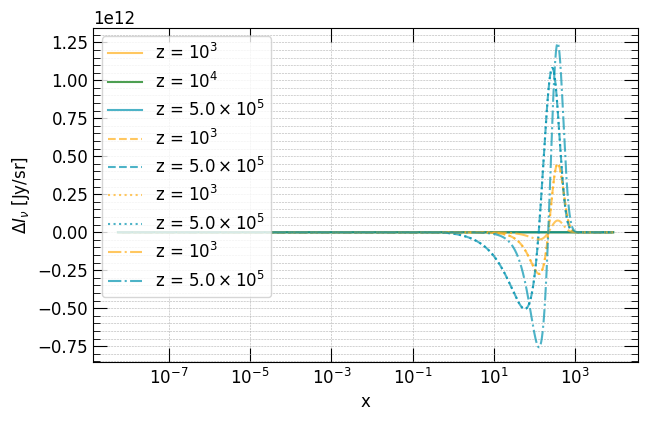

In [10]:
#colors = plt.colormaps['jet'].resampled(4)

fig, ax1 = plt.subplots(1, 1, figsize=set_size(width))
for i in range(len(zh)):
        ax1.plot(nu[i], DI_N[i], label=f"z = {sci_notation(zh[i])}", color = colors4[i+2], alpha = 0.7)

for i in range(len(zh)):
        if(i!=1):
                ax1.plot(nu2[i], DI_N2[i], label=f"z = {sci_notation(zh[i])}", color = colors4[i+2], alpha = 0.7, linestyle = "--")
       
for i in range(len(zh)):
        if(i!=1):
                ax1.plot(nu3[i], DI_N3[i], label=f"z = {sci_notation(zh[i])}", color = colors4[i+2], alpha = 0.7, linestyle = ":")

for i in range(len(zh)):
        if(i!=1):
                ax1.plot(nu4[i], DI_N4[i], label=f"z = {sci_notation(zh[i])}", color = colors4[i+2], alpha = 0.7, linestyle = "-.")

ax1.set_xscale('log')
#ax1.set_ylim([1e+0, 5e+3])
#ax1.set_xlim([1e+0, 5e+3])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")
#ax1.set_xlabel("$\\nu$ [GHz]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
plt.legend(loc='best')
#plt.savefig('outputs/p4p/lateGFI.pdf', dpi=300,bbox_inches="tight")
plt.show()

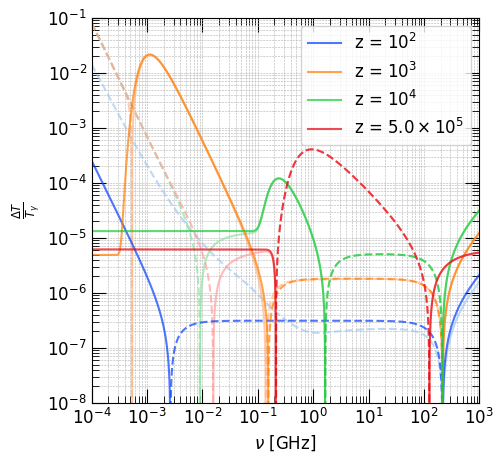

In [11]:
colors1=sns.color_palette("bright",6) 
colors2=sns.color_palette("pastel",6) #personal fav 

fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
for i in range(len(zh2)):
        ax1.plot(nu[i], DT[i], color = colors2[i], alpha = 0.7)
        ax1.plot(nu[i], -DT[i], color = colors2[i], alpha = 0.7,linestyle = "dashed")

#for i in range(len(zh)):
#        
#        ax1.plot(nu[i], DT2[i], label=f"z = {sci_notation(zh[i])}, xe", color = colors2[i], alpha = 0.7)
#        ax1.plot(nu[i], -DT2[i],  color = colors2[i], alpha = 0.7,linestyle = "dashed")

#for i in range(len(zh)):
#        
#        ax1.plot(nu[i], DT3[i], label=f"z = {sci_notation(zh[i])}, xe and hc", color = colors1[i], alpha = 0.7)
#        ax1.plot(nu[i], -DT3[i], color = colors1[i], alpha = 0.7,linestyle = "dashed")

for i in range(len(zh2)):
     
        ax1.plot(nu[i], DT4[i], label=f"z = {sci_notation(zh2[i])}", color = colors1[i], alpha = 0.7)
        ax1.plot(nu[i], -DT4[i], color = colors1[i], alpha = 0.7,linestyle = "dashed")
       

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([1e-8, 1e-1])
ax1.set_xlim([1e-4, 1e+3])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\\frac{\\Delta T}{T_{\gamma}}$")
ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
plt.legend(loc='best')
plt.savefig('outputs/p4p/DTcomparison.pdf', dpi=300,bbox_inches="tight")
plt.show()

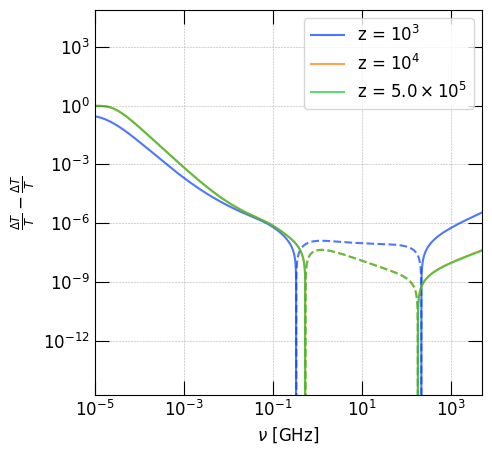

In [12]:
colors1=sns.color_palette("bright",3) 
colors2=sns.color_palette("pastel",3) #personal fav 

fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
for i in range(len(zh)):
        ax1.plot(nu[i], -DT[i]+DT4[i], label=f"z = {sci_notation(zh[i])}", color = colors1[i], alpha = 0.7)
        ax1.plot(nu[i], +DT[i]-DT4[i], color = colors1[i], alpha = 0.7,linestyle = "dashed")


#for i in range(len(zh)):
#        ax1.plot(nu[i], DT2[i]-DT3[i], label=f"z = {sci_notation(zh[i])}", color = colors2[i], alpha = 0.7)
#        ax1.plot(nu[i], -DT2[i]+DT3[i], color = colors2[i], alpha = 0.7,linestyle = "dashed")

#for i in range(len(zh)):
#        
#        ax1.plot(nu[i], DT2[i], label=f"z = {sci_notation(zh[i])}, xe", color = colors2[i], alpha = 0.7)
#        ax1.plot(nu[i], -DT2[i],  color = colors2[i], alpha = 0.7,linestyle = "dashed")

#for i in range(len(zh)):
#        
#        ax1.plot(nu[i], DT3[i], label=f"z = {sci_notation(zh[i])}, xe and hc", color = colors1[i], alpha = 0.7)
#        ax1.plot(nu[i], -DT3[i], color = colors1[i], alpha = 0.7,linestyle = "dashed")

#for i in range(len(zh)):
#     
#        ax1.plot(nu[i], DT4[i], label=f"z = {sci_notation(zh[i])}", color = colors1[i], alpha = 0.7)
#        ax1.plot(nu[i], -DT4[i], color = colors1[i], alpha = 0.7,linestyle = "dashed")
       

ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.set_ylim([1e+0, 5e+3])
ax1.set_xlim([1e-5, 5e+3])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\\frac{\Delta T}{T} - \\frac{\Delta T}{T}$")
ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
plt.legend(loc='best')
plt.savefig('outputs/p4p/DTcomparison2.pdf', dpi=300,bbox_inches="tight")
plt.show()